<div class="alert alert-danger" style="text-align:left;"><h1>Machine Learning Prediction Model<span style="float:right;"></span></h1></div>


# Heart Disease Prediction

## Task Description
Using patient data that is given in the dataset <a href="./data_heart_disease.csv">data_heart_disease.csv</a>, machine learning models needs to be built to predict whether a patient has heart disease, or not, based on the appropriate input features from the dataset.
The tasks have been broken down into three topics: 

1. The first section relates to exploratory analysis and pre-processing of the data.
2. The second section involves building a decision tree model for predicting whether or not someone has heart disease.
3. The third section is about neural networks where an ANN needs to be built for the same classification exercise.

<div class="alert alert-success" style="text-align:left;"><h2>1. Exploratory Analysis and Pre-processing<span style="float:right;"></span></h2></div>

This section concerns analysing and pre-processing the dataset.

<h3 style="text-alight:left;">1a. <span style="float:right;"></span> </h3>

Import all the relevent packages that are needed for running your code in all parts of section 1, and load the dataset from `data_heart_disease.csv` into a pandas DataFrame named `data`.

#### 1a. Code

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data_heart_disease.csv")

View the dataset by running the code cell below.

In [6]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HRMaxGap,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,8,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,15,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,85,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,64,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,43,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,11,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,48,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,-11,1


<h3 style="text-alight:left;">1b. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath ***1b. Code*** to produce a suitable plot to show which age group in the dataset has the largest sample size.
Here, an age group should be defined every 10 years; for example ages 30-40, 40-50, etc.

Your plot should be clearly labelled and you should write down which age group has the largest sample size (e.g. age group 90-100) in the markdown cell headed ***1b. Answer*** below your plot code.

#### 1b. Code

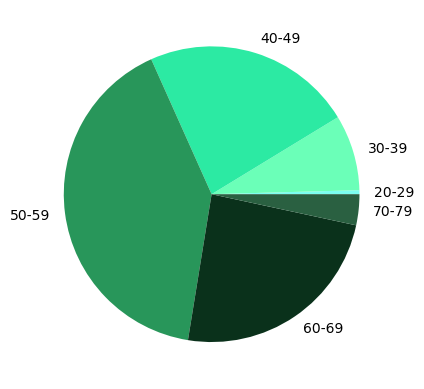

<AxesSubplot:xlabel='Age', ylabel='Frequency'>

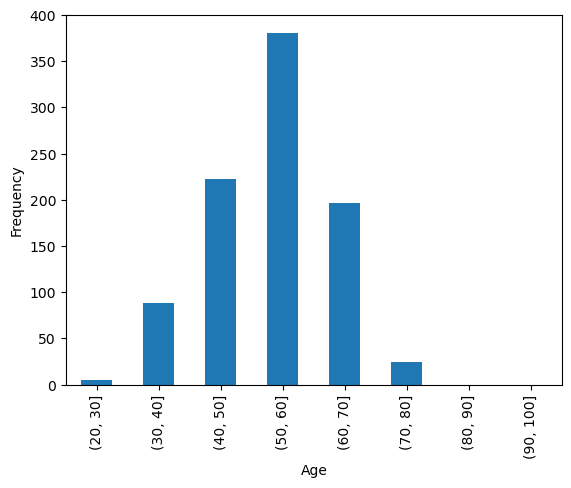

In [20]:
# bins - sequence of scalars, defines edges
bins = [20, 30, 40, 50, 60, 70, 80]
# groups - labels for the pie chart
groups =  ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

# colours for sections of pie chart
colors = ['#7CFEF0','#6BFFB8','#2CEAA3','#28965A','#0A311B','#2A6041']

# creates new column and adds respective ages to the np array via a count
data["Age Group"] = pd.cut(data["Age"], bins = bins, labels = groups, right=False)
age = np.array(data.groupby(["Age Group"])["Age"].count())

# plot pie chart
plt.pie(age, labels = groups, colors=colors)
plt.show()

#data["Age"].min()
#data["Age"].max()

grouped = pd.cut(data["Age"], bins=range(20,110,10))
data_ageGroup = data.groupby(grouped)["Age"].count()
plt.ylabel("Frequency")
data_ageGroup.plot(kind="bar")

#### 1b. Answer

50-59

<h3 style="text-alight:left;"> 1c. <span style="float:right;"></span> </h3>

Using your answer from 1b, write the code in the code cell beneath ***1c. Code*** to report the number of patients in the most populous age group. Write the answer that you obtain in the markdown cell beneath ***1c. Answer***.

#### 1c. Code

In [8]:
pop_age = age.max()
pop_age

374

#### 1c. Answer

374 patients

<h3 style="text-alight:left;"> 1d. <span style="float:right;"></span> </h3>

How does the prevalence of heart disease compare in the data between the two sexes?

Write the code in the code cell beneath ***1d. Code*** to find this data and enter your findings in the markdown cell beneath ***1d. Answer***. Your answer should contain some relevent statistic to show how they compare rather than just stating "Sex *** has the highest prevalence of heart disease". 

#### 1d. Code

In [9]:
data_m = data[data["Sex"] == "M"]
data_f = data[data["Sex"] == "F"]

# total number of males and females
no_men = len(data_m)
no_women = len(data_f)

# calculates the percentage of people with heart disease
# np array [no heart disease, heart disease]

# males
m_hd_array = np.array(data_m.groupby(["HeartDisease"])["HeartDisease"].count())
m_hd_percentage = (m_hd_array[1] / no_men) * 100

# females
f_hd_array = np.array(data_f.groupby(["HeartDisease"])["HeartDisease"].count())
f_hd_percentage = (f_hd_array[1] / no_women) * 100


# statstic calculation
print("Percentage of males with Heart Disease: ", m_hd_percentage,"%")
print("Percentage of females with Heart Disease: ", f_hd_percentage,"%")

print("Percentage difference: ", m_hd_percentage-f_hd_percentage,"%")


# creates the plot for a visual represntation 
# x_labels = ['Sex']

#x_axis = np.arange(len(x_labels))

#plt.bar(x_axis + 0.2, m_hd_percentage, 0.4, label = 'Male')
#plt.bar(x_axis - 0.2, f_hd_percentage, 0.4, label = 'Female')

#plt.xticks(x_axis, x_labels)
#plt.ylabel("Percentage of heart disease")
#plt.title("Heart Disease Percentage between Sex")
#plt.legend()
#plt.show()

Percentage of males with Heart Disease:  63.172413793103445 %
Percentage of females with Heart Disease:  25.906735751295333 %
Percentage difference:  37.265678041808115 %


#### 1d. Answer

Overall males have a higher percentage of of heart disease than females. More specifically, the difference in perecentage is approximately 37%. The percentage values for each sex are shown above.

<h3 style="text-alight:left;"> 1e. <span style="float:right;"></span> </h3>

Write the code beneath ***1e. Code*** to create a suitable plot which illustrates the ranges of each of the numerical features in the dataset. 
You should report which feature has the largest range in the markdown cell beneath ***1e. Answer***, stating its range. For example, feature A has the largest range with a range of 50.

#### 1e. Code

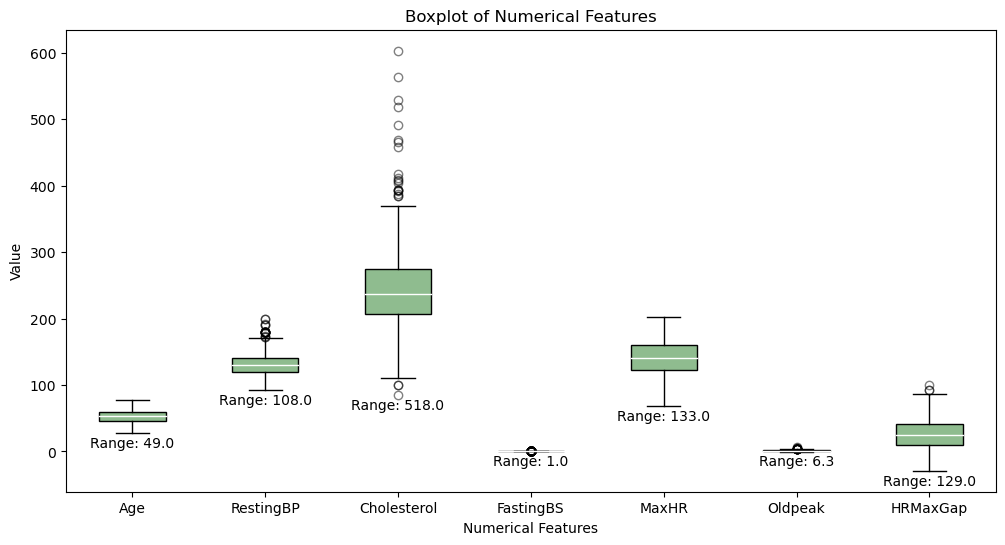

In [10]:
# cols - list of numerical feature names
cols = ["Age","RestingBP", "Cholesterol","FastingBS", "MaxHR", "Oldpeak", "HRMaxGap"]

# creates temporary data set that drops the empty values
temp = data[cols].dropna()

# converts the data to numpy arrays
age_boxplt = np.array(temp["Age"])
restingBP = np.array(temp["RestingBP"])
cholesterol = np.array(temp["Cholesterol"])
fastingBS = np.array(temp["FastingBS"])
maxHR = np.array(temp["MaxHR"])
oldpeak = np.array(temp["Oldpeak"])
hrMaxGap = np.array(temp["HRMaxGap"])

# create a list of the numerical data arrays
numerical_features = [age_boxplt, restingBP, cholesterol, fastingBS, maxHR, oldpeak, hrMaxGap]

# create a boxplot with column names as labels
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(numerical_features, labels=cols, patch_artist=True)

# changes colour and style of the boxplots
colors = ['#8fbc8f','#8fbc8f','#8fbc8f', '#8fbc8f', '#8fbc8f', '#8fbc8f', '#8fbc8f']
for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color)
for median in bp['medians']: median.set(color ='white')
for flier in bp['fliers']: flier.set(color ='#e7298a', alpha = 0.5)

# sets axis labels and title
ax.set_xlabel('Numerical Features')
ax.set_ylabel('Value')
ax.set_title('Boxplot of Numerical Features')

# calculates ranges and displays it on the plot
for i in range(len(numerical_features)):
    feature = numerical_features[i]
    minimum = np.min(feature)
    maximum = np.max(feature)
    ax.text(i+1, minimum-5, f'Range: {(maximum-minimum):.1f}', horizontalalignment='center', verticalalignment='top',
            fontsize=10)

plt.show()

#### 1e. Answer

Feature Cholesterol has the largest range with a range of 518.

<h3 style="text-alight:left;"> 1f. <span style="float:right;"></span> </h3> 

This question has two parts.

**Part I:** Do any features have missing values? You should use appropriate functions on the dataframe to find this out, and write your code in the cell ***1f. Part I Code***. In the markdown cell ***1f. Part I Answer***, write down which features (if any) have missing values.

#### 1f. Part I Code

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data_heart_disease.csv")
# uses isnull() with sum() to calculate the number of missing values in each feature of the dataframe
data.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HRMaxGap            0
HeartDisease        0
dtype: int64

#### 1f. Part I Answer

The RestingBP (1) and Cholesterol (172) have missing values.

**Part 2:** Use an appropriate technique to handle any missing values in the data. Your code should be written in the cell ***1f. Part II Code***. Write a brief explanation of why you chose this method in the markdown cell ***1f. Part II Answer***.

#### 1f. Part II Code

In [12]:
# drops the one missing value in the RestingBP column
dropped_data = data.dropna(subset=["RestingBP"])

# calculates the average cholesterol level for male and females
m_mean_ch = dropped_data.loc[dropped_data["Sex"] == 'M', 'Cholesterol'].mean()
f_mean_ch = dropped_data.loc[dropped_data["Sex"] == 'F', 'Cholesterol'].mean()

# fills the missing cholesterol values for the male and female genders
dropped_data.loc[dropped_data['Sex']=='M', 'Cholesterol'] = dropped_data.loc[dropped_data['Sex']=='M', 'Cholesterol'].fillna(m_mean_ch)
dropped_data.loc[dropped_data['Sex']=='F', 'Cholesterol'] = dropped_data.loc[dropped_data['Sex']=='F', 'Cholesterol'].fillna(f_mean_ch)

dropped_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HRMaxGap,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,8,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,15,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,85,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,64,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,43,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,11,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,48,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,-11,1


#### 1f. Part II Answer

Two techniques were adopted to deal with the missing values in the data set.

The first technique used was the removal of a row. As RestingBP only had one missing value removing the row would not cause a detrimental effect to the the overall data as there is a large enough sample size of 917 other entries that can be used.

The second technique used was using the fillna() method to replace all missing data of the Cholesterol with a value chosen to be the mean data point for a particular Sex. Due to the differing values in cholesterol between males and females, the average cholesterol was calculated for each sex, and then populated into the data frame for their respective values. Removing these rows would have been too costly to the data as 172 entries is too large to simply just "ignore". Other methods such as zeroing the value also would have hindered a plot for cholesterol later on. As such using an average value based on the sex, results in a more valid value for the cholesterol. The average also could have been calculated based on the age group, however this would have been swayed heavily on the range of each group. I feel using average cholesterol based on the sex was the best choice.

<h3 style="text-alight:left;"> 1g. <span style="float:right;"></span> </h3>

This section has two parts.

**Part I:** Which features in the heart disease data are categorical? You should use appropriate functions on the dataframe to find this out, and write your code in the cell ***1g. Part I Code***. In the markdown cell ***1g. Part I Answer***, write down which features are categorical.

#### 1g. Part I Code

In [13]:
# inital inspection of types with dtypes function - displays the data types of the data frame
# 'object' implies categroical data
# FastingBS and HeartDisease are also categroical data but are numerical values so display 'int64'
#data.dtypes

# changes all categorical features to the type 'category'
#cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]
#data[cols] = data[cols].astype("category")

data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HRMaxGap            int64
HeartDisease        int64
dtype: object

#### 1g. Part I Answer

Categorical Features: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

N.B. FastingBS and HeartDisease contain categorical data but are not categorical features as they contain numerical values.

**Part II:** Use an appropriate technique to transform the categorical features so that they are suitable for training a machine learning model. Your code should be written in the cell ***1g. Part II Code***. In the markdown cell ***1g. Part II Answer***, give the name of the preprocessing technique you used and briefly explain how this transforms the data.

#### 1g. Part II Code

In [14]:
# pd.options.mode.chained_assignment = None  # default='warn'
# dropped_data["Sex"].unique()
# dropped_data["Sex"] = dropped_data["Sex"].map({'F':0,'M':1})

# dropped_data["ChestPainType"].unique()
# dropped_data["ChestPainType"] = dropped_data["ChestPainType"].map({'ATA':0,'NAP':1,'ASY':2,'TA':3})

# dropped_data["RestingECG"].unique()
# dropped_data["RestingECG"] = dropped_data["RestingECG"].map({'Normal':0,'ST':1,'LVH':2})

# dropped_data["ExerciseAngina"].unique()
# dropped_data["ExerciseAngina"] = dropped_data["ExerciseAngina"].map({'N':0,'Y':1})

# dropped_data["ST_Slope"].unique()
# dropped_data["ST_Slope"] = dropped_data["ST_Slope"].map({'Up':2,'Flat':0,'Down':1})

dropped_data = pd.get_dummies(dropped_data)


dropped_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HRMaxGap,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,8,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,15,1,1,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,85,0,0,1,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108,1.5,64,1,1,0,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122,0.0,44,0,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,43,1,0,1,...,0,1,0,1,0,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,11,1,0,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,48,1,0,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130.0,236.0,0,174,0.0,-11,1,1,0,...,0,0,1,0,0,1,0,0,1,0


#### 1g. Part II Answer

One-hot encoding was used here to create a new binary column for every possible value in the categorical features. The column that corresponds to the original category is given a value of 1 in each instance, while the other columns are given a value of 0. The original column is removed because it is no longer necessary. Using the get_dummies() function categorical variables are converted into 'dummy variables' via the process of one-hot encoding. For example, the column "ChestPainType" has values: ATA, NAP, ASY and TA. Therefore 4 new columns are added.

<h3 style="text-alight:left;"> 1h. <span style="float:right;"></span> </h3>

Are there any further preprocessing steps required to prepare the data for building the machine learning models in Sections 2 and 3? For any additional steps you identify, you should:
* Write the code below the ***1h. Code*** heading. You can add as many code cells as you need.
* In the ***1h. Answer*** markdown cell, write a brief **description** of what you have done and a brief justification of **why** you have done it.

#### 1h. Code

In [15]:
#scale the data
from sklearn.preprocessing import MinMaxScaler

# fits the scaler to the data, and transform the data using the scaler
norm = MinMaxScaler().fit(dropped_data)
arr = norm.transform(dropped_data)

# create a dataframe from the scaled array
dropped_data = pd.DataFrame(arr, columns=dropped_data.columns)

# describe to see the min and max values - all min values are 0 and max values are 1
dropped_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HRMaxGap,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,0.520597,0.437841,0.307224,0.233370,0.540771,0.396215,0.425371,0.552890,0.210469,0.789531,...,0.220284,0.050164,0.205016,0.600872,0.194111,0.595420,0.404580,0.068702,0.500545,0.430752
std,0.192605,0.149998,0.103050,0.423206,0.179346,0.121245,0.170541,0.497466,0.407864,0.407864,...,0.414664,0.218401,0.403934,0.489986,0.395731,0.491078,0.491078,0.253085,0.500273,0.495452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.333333,0.249035,0.000000,0.422535,0.295455,0.289855,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.416667,0.301237,0.000000,0.549296,0.363636,0.420290,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.653061,0.500000,0.351351,0.000000,0.676056,0.465909,0.543478,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1h. Answer

Here the MinMaxScaler provided by Scikit-learn is used to transform the data into a given range, in this case 0 and 1. The scaler is fit to the data and the minimum and maximum values from the data are calculated to be used for scaling. The transform() function performs the scaling, returning a NumPy array to be recreated into a dataframe. The dropped_data dataframe contains all the data, with the features scaled to be between 0 and 1.

Using MinMaxScaler the shape of the original distribution is preserved. The information present in the original data is not materially altered using this method.

<div class="alert alert-success" style="text-align:left;"><h2>2. Decision Trees<span style="float:right;"></span></h2></div>

This section concerns building and evaluating a decision tree using `sklearn`.

<h3 style="text-alight:left;"> 2a. <span style="float:right;"></span> </h3>

Build a decision tree in the code cell beneath the heading ***2a. Code*** to predict the presence of heart disease in a patient and call it `tree_d`. 
In the markdown cell beneath the heading ***2a. Answer***, briefly explain the parameters and values that you chose in the function calls used to build the decision tree, and explain what input features and target output/labels you used in the training.

#### 2a. Code

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

heart_disease_df = dropped_data
#heart_disease_df

# prepare the training and testing datasets, y - class labels, x - input features
y = heart_disease_df['HeartDisease']
X = heart_disease_df.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# The decision tree implementation
tree_d = DecisionTreeClassifier(max_depth=4,random_state=1) 
tree_d.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

#### 2a. Answer

The test set was chosen to be 30% as it allows for the majority to be used for training the decision tree. The max_depth was repeatedly changed to various values and it was observed that a max_depth of 4 gave the highest accuracy.  Lastly, the random_state was set to 1 allowing the decision tree results to be reproducible.

<h3 style="text-alight:left;"> 2b. <span style="float:right;"></span> </h3>

Write some code in the code cell beneath the heading ***2b. Code*** to evaluate the decision tree model that you built. Your code should `print` out the accuracy of the model for correctly classifying whether patients have or do not have heart disease. 

#### 2b. Code

In [27]:
# use our trained tree to predict labels for the test data
y_predict = tree_d.predict(X_test) 

# calculate the accuracy by comparing the true labels (y_test) to the predicted labels (y_predict)
print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict)) 

Testing accuracy: 	 0.8514492753623188


<h3 style="text-alight:left;"> 2c. <span style="float:right;"></span> </h3>

Using a confusion matrix, analyse and report the accuracy of the decision tree that you trained. 
You should write your code in the code cell beneath the heading ***2c. Code***, and use the markdown cell beneath the heading ***2c. Answer*** to report, with reference to your confusion matrix, which class your decision tree model is better at classifying.

#### 2c. Code

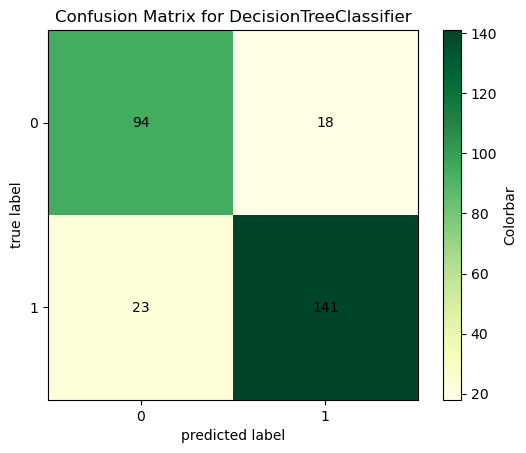

In [28]:
cm = metrics.confusion_matrix(y_test,y_predict)

# Plot the Confusion Matrix
def cf_matrix(mat, t_name, model_name):
    
    fig, ax = plt.subplots()
    im = ax.imshow(mat, cmap='YlGn')
    
    cbar = plt.colorbar(im)
    cbar.set_label("Colorbar")
    
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
    
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.title(f"Confusion Matrix for {model_name}")
    
cf_matrix(cm,[0,1],'DecisionTreeClassifier')

#### 2c. Answer

From the Confusion Matrix for the DecisionTreeClassifier its does very well at classifying heart disease for people that have heart disease - only 23 are misclassified. It also does well at classifying the opposite, for people that do not have heart disease. It correctly predicts this 94 times with only 18 misclassified. There are far more instances of people having heart disease, so it is more likely the model will find those cases easier to recognise.

<h3 style="text-alight:left;"> 2d. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***2d. Code*** to draw your trained decision tree.

***There are two parts of this section for the analysis:***

In part I, use your plot to analyse your trained decision tree and comment in the markdown cell beneath the heading ***2d. Part I Answer*** on what the three most important features are that are used to predict the presence of heart disease.

In part II, extract a list of rule(s) from your decision tree plot that can be used to classify people with or without heart disease, and write these into the markdown cell beneath the heading ***2d. Part II Answer***.

#### 2d. Code

[Text(0.5267857142857143, 0.9, 'ST_Slope_Up <= 0.5\ngini = 0.498\nsamples = 641\nvalue = [298, 343]\nclass = Has HD'),
 Text(0.2857142857142857, 0.7, 'MaxHR <= 0.637\ngini = 0.321\nsamples = 358\nvalue = [72, 286]\nclass = Has HD'),
 Text(0.14285714285714285, 0.5, 'Sex_M <= 0.5\ngini = 0.233\nsamples = 297\nvalue = [40, 257]\nclass = Has HD'),
 Text(0.07142857142857142, 0.3, 'RestingBP <= 0.425\ngini = 0.488\nsamples = 38\nvalue = [16, 22]\nclass = Has HD'),
 Text(0.03571428571428571, 0.1, 'gini = 0.457\nsamples = 17\nvalue = [11, 6]\nclass = No HD'),
 Text(0.10714285714285714, 0.1, 'gini = 0.363\nsamples = 21\nvalue = [5, 16]\nclass = Has HD'),
 Text(0.21428571428571427, 0.3, 'ChestPainType_ASY <= 0.5\ngini = 0.168\nsamples = 259\nvalue = [24, 235]\nclass = Has HD'),
 Text(0.17857142857142858, 0.1, 'gini = 0.308\nsamples = 63\nvalue = [12, 51]\nclass = Has HD'),
 Text(0.25, 0.1, 'gini = 0.115\nsamples = 196\nvalue = [12, 184]\nclass = Has HD'),
 Text(0.42857142857142855, 0.5, 'ChestPa

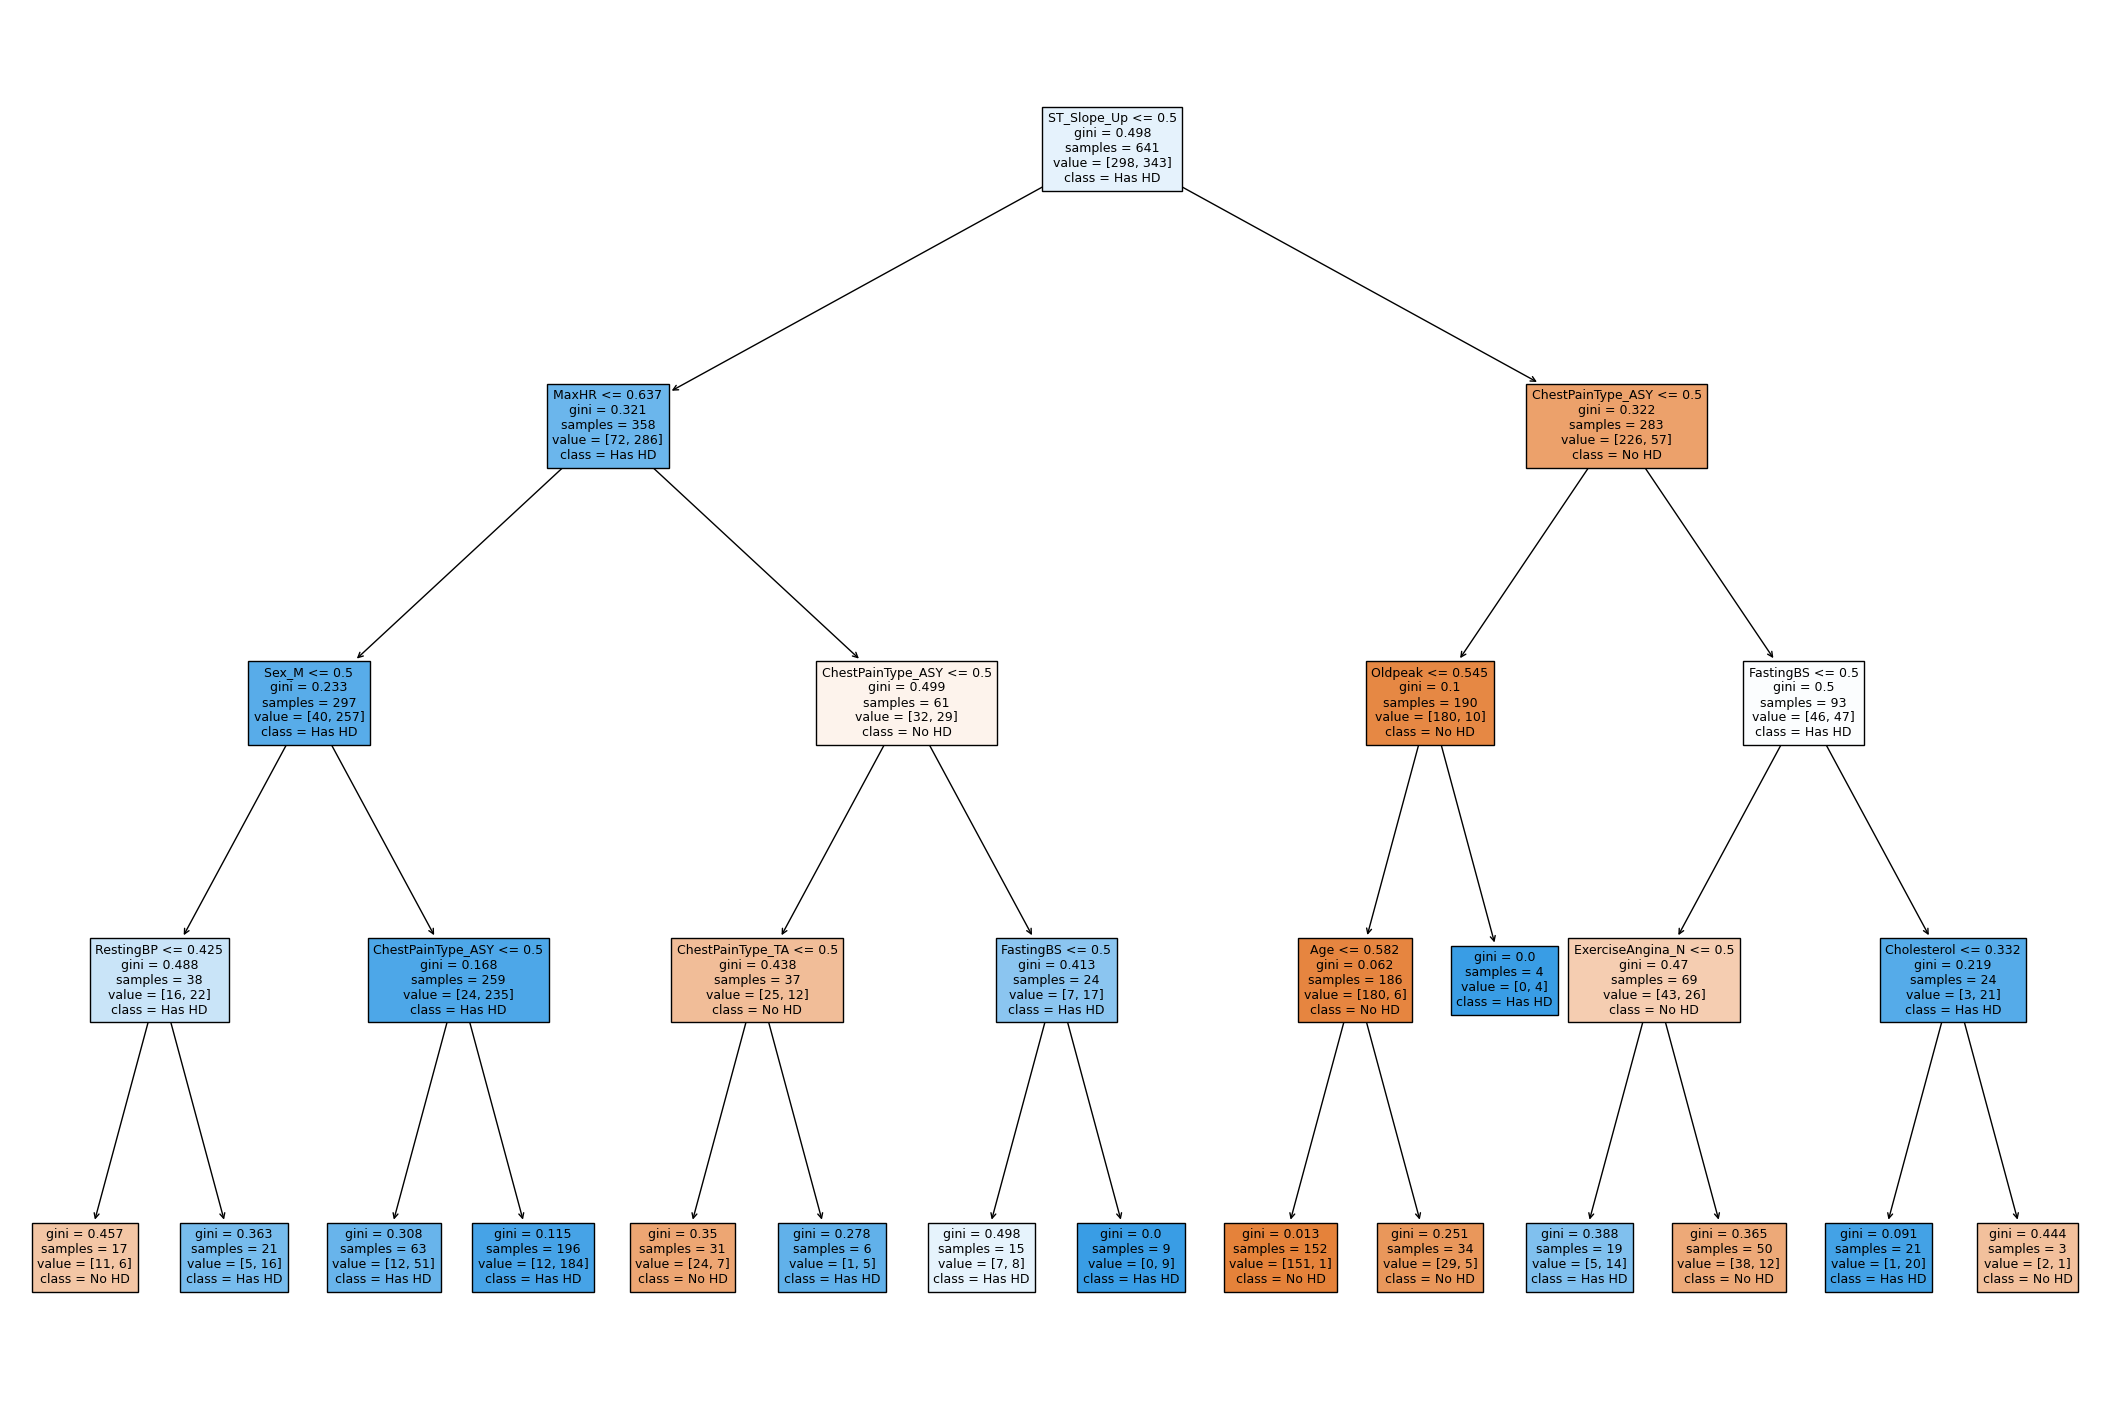

In [29]:
patient_hd_features = list(X_train.columns)
patient_hd_class = ['No HD','Has HD'] # No HD = 0, Has HD = 1

# plots decision tree
plt.figure(figsize=(27,18))
plot_tree(tree_d, feature_names = patient_hd_features, class_names=patient_hd_class, filled=True, fontsize=9)

#### 2d. Part I Answer

Most important features:
- ST_Slope_Up
- MaxHR
- ChestPainType_ASY

These are the most important features because they appear in the uppermost levels of the tree.

#### 2d. Part II Answer

1 rule for **"has heart disease"**

If a patient has:
1. ST_Slope_Up <= 0.5
2. MaxHR <= 0.637
3. Sex_M <= 0.5
4. ChestPainType_ASY <= 0.5

Then they have heart disease.

1 rule for **"no heart disease"**

If a patient has:
1. ST_Slope_Up <= 0.5
2. ChestPainType_ASY <= 0.5
3. Oldpeak <= 0.545
4. Age <= 0.582

Then they have no heart disease.




<h3 style="text-alight:left;"> 2e. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***2e. Code*** which enables you to test and evaluate the performance of decision tree models used for classifying people with or without heart disease. You should use this code to perform an experiment to find the best depth of a decision tree classification model. You should then explain your chosen best decision tree model in the markdown cell beneath the heading ***2e. Answer*** with respect to: its accuracy, over-fitting, features, true positives, and true negatives.

#### 2e. Code

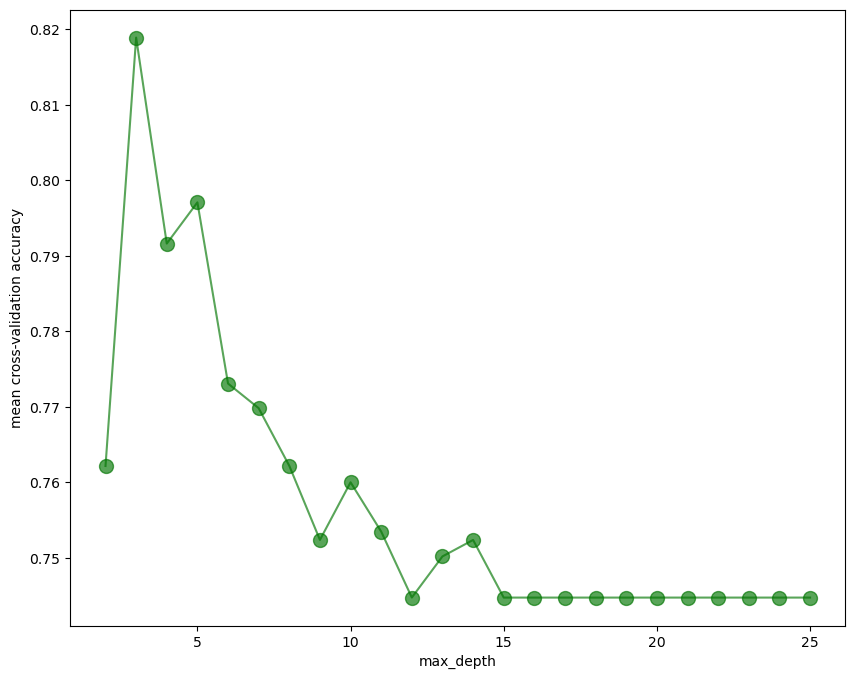

In [30]:
cv_scores = list()
depth_values = range(2,26)

for d in depth_values:
    tree_d_k = DecisionTreeClassifier(max_depth = d,random_state=1)
    score = cross_val_score(tree_d_k, X, y, cv=3, scoring='accuracy')

    mean_score = score.mean()
    cv_scores.append(mean_score)
    

plt.figure(figsize=(10,8))
plt.plot(depth_values, cv_scores, '-o',markersize=10,alpha=0.65,color='#007500')
plt.xlabel('max_depth')
plt.ylabel('mean cross-validation accuracy')
plt.show()

#### 2e. Answer

One of the best mean accuracies is provided here by a max depth of 3. The complexity of the tree increases as additional layers are added, yet there is no improvement in classification accuracy. The likelihood of overfitting the training data increases with tree size, which could explain the performance decline we observe in this case as the tree's number of levels rises. The tree returns the earliest instance of a true positive at a max_depth of 3. Furthermore overfitting has not occured at a max_depth of 3 due the training data not being noisy, i.e. it contains the most relevant features. It can also be observed from the graph that at this max depth the number of true positives and true negatives increases, meaning that as the max depth increases the number of true positives and true negatives decreases.

<div class="alert alert-success" style="text-align:left;"><h2>3. Neural Networks<span style="float:right;"></span></h2></div>


This section concerns building and evaluating a neural network using `sklearn`, comparing and contrasting it with your Decision Tree method.

<h3 style="text-alight:left;"> 3a. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***3a. Code*** to build a neural network to predict the presence of heart disease in a patient. 
Briefly explain the parameters and values that you chose in the functions used in the markdown cell beneath the heading ***3a Answer***.

#### 3a. Code

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(4,3), max_iter=1000,random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(4, 3), max_iter=1000, random_state=1)

#### 3a. Answer

The hidden_layer_sizes parameter takes a tuple defining the number of neurons in each hidden layer. In this case hidden_layer_sizes=(4,3) gives two hidden layers, where the first has 4 neurons and the second has 3 neurons.

Furthermore the max_iter value was fixed at 1000 - this means that the training will terminate after 1000 epochs, if it has not already converged.

<h3 style="text-alight:left;"> 3b. <span style="float:right;"></span> </h3>

Write the code in the code cell beneath the heading ***3b. Code*** to evaluate the neural network model that you built. Your code should output relevant statistics to show which of the decision tree and neural network models is better in terms of overall accuracy.

#### 3b. Code

In [36]:
# use our trained network to predict labels for the test data
y_predict = mlp.predict(X_test) 
print('Neural Network Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict))
y_predict_train = mlp.predict(X_train) # use our trained network to predict labels for the training data
print('Neural Network Training accuracy: \t', metrics.accuracy_score(y_train, y_predict_train))

# use our trained tree to predict labels for the test data
dt_y_predict = tree_d.predict(X_test) 
# calculate the accuracy by comparing the true labels (y_test) to the predicted labels (y_predict)
print('Decision Tree Testing accuracy: \t', metrics.accuracy_score(y_test, dt_y_predict)) 



Neural Network Testing accuracy: 	 0.8623188405797102
Neural Network Training accuracy: 	 0.8798751950078003
Decision Tree Testing accuracy: 	 0.8514492753623188


<h3 style="text-alight:left;"> 3c. <span style="float:right;"></span> </h3>

Compared to the decision tree model that you built, is your neural network model better at classifying people with heart disease, or better at classifying people without heart disease? 

You should write any code used for your evaluation in the code cell beneath the heading ***3c. Code*** and write into the markdown cell beneath ***3c. Answer*** to explain the reasons behind your answer. You should use a confusion matrix to support your answers.

#### 3c. Code

Training accuracy: 	 0.8798751950078003
Testing accuracy: 	 0.8623188405797102


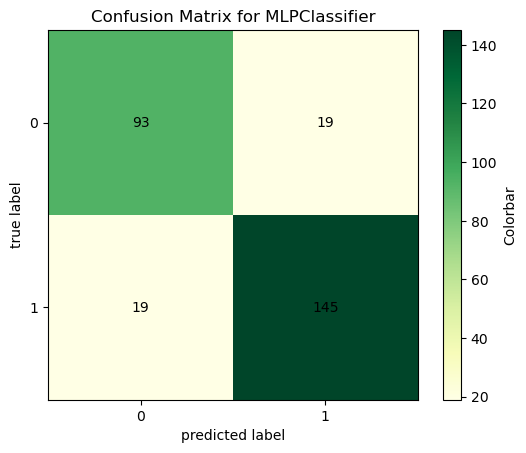

In [37]:
cm_mlp = metrics.confusion_matrix(y_test,y_predict) # calculate confusion matrix for the neural network
cf_matrix(cm_mlp,[0,1],'MLPClassifier') # plot the confusion matrix

y_predict_train = mlp.predict(X_train) # use our trained network to predict labels for the training data

# calculate the accuracies for both training and testing data
print('Training accuracy: \t', metrics.accuracy_score(y_train, y_predict_train))
print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict)) 

#### 3c. Answer

Here the neural network is better at classifying people with heart disease compared to the descision tree. A slight improvement of 4 is seen for the true positive. The neural network has approximately 88% precision when clasifying true positives. In addition to this, the neural network is slightly worse at classifying people without heart disease compared to the decision tree. It misclassifies in total 19 false positives compared to the 18 false positives from the decision tree. 

Overall, the network is better at classifying people with heart disease and the decision is beeter at classifying people without heart disease (although there is a minor difference of one).

<h3 style="text-alight:left;"> 3d. <span style="float:right;"></span> </h3>

How would you suggest improving the accuracy of predicting the presence of heart disease in new patients? Briefly explain in the markdown cell beneath the heading ***3d. Answer*** any potential strategies you could use to improve the model's performance on unseen data. Your answer should make particular reference to any shortcomings of the training dataset used for this coursework.

#### 3d. 

- One strategy that could be used is increasing the overall sample size of the data collected for Heart Disease patients. It clear from the data the number of males and females were not equal as such the accuracy for prediciting Heart Disease in both sexes would vary.
- Another strategy that could be used is treating outlier values. It was clear from the box plots that there were various outliers in the features of the dataframe. Dealing with these would result in a more accurate model, improving the overall performance.
- Another strategy that could be used is tuning the hyper-parameters. Changing the method of search for the hyper-parameters or inlcuding a more varied range of parameters for either the Decision Tree of MLP can result in an improved model.